# Face Swap

#### In this code, we will be able to exchange the faces of two photographs, from a facial recognition pattern. 

Based on [PySource.com code](https://pysource.com/2019/04/04/face-swapping-opencv-with-python-part-1/)

Jhonny Calvo

### Neccessary Libraries

In [ ]:
#matplot lib, to see the images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print('ready!')

ready!


We will use Opencv and Lib libraries

In [ ]:
#OpenCv is the main librarie of image manipulation
!pip install opencv-python
import cv2
import numpy as np
import dlib
#to visualize the images with better quality
from google.colab.patches import cv2_imshow  
print('downloaded!')

downloaded!


In [ ]:
#to import from website
!pip install wget
import wget
print('ready')

ready


### Getting images

In [ ]:
url='https://files.alerta.rcnradio.com/alerta_bogota/public/styles/article_desktop/public/2019-10/el_man_0.jpg?itok=wWjcWmPw'
wget.download(url, 'sa.jpg')
url2='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Scarlett_Johansson_in_Kuwait_01b-tweaked.jpg/220px-Scarlett_Johansson_in_Kuwait_01b-tweaked.jpg'
wget.download(url2, 'sj.jpg')
print('Imágenes Descargadas!')

Imágenes Descargadas!



we will use the following facial patterns file :

In [ ]:
url ='https://github.com/AKSHAYUBHAT/TensorFace/raw/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat'
wget.download(url, 'shape_predictor_68_face_landmarks.dat')

'shape_predictor_68_face_landmarks.dat'

#### Exploring Images
Image 1-principal face

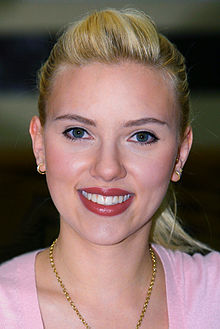

In [ ]:
#IMAGE 1
img = cv2.imread("sj.jpg")
cv2_imshow(img)

Image2-background body

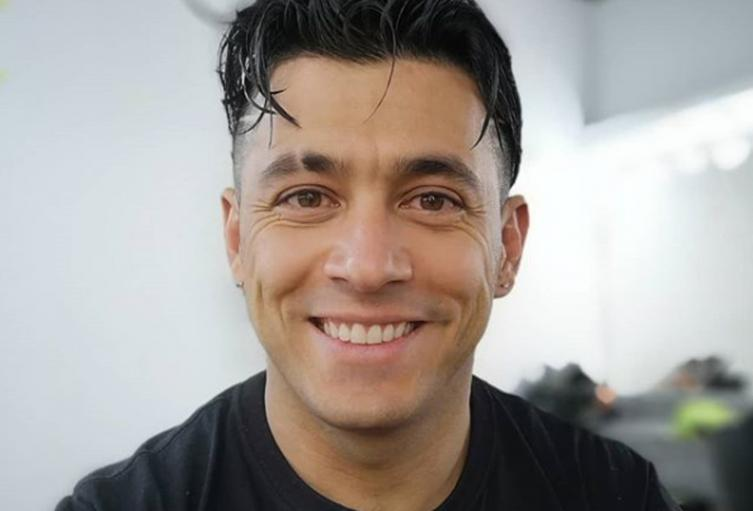

In [ ]:
#IMAGE 2
img2 = cv2.imread("sa.jpg")
cv2_imshow(img2)

### Transforming images to adecuate analysist format
#### Let's work with image 1 first

Setting both images in gray color


In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
plt.imshow(img_gray, cmap='gray')
plt.show 

NameError: ignored

<function matplotlib.pyplot.show>

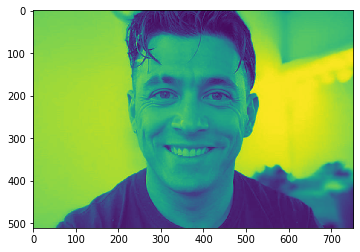

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')
plt.show

### Detecting face landmark
Here, we detect the facial pattern in the images, such as the face shape as a landmark reference

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

Now we calculate the convex hull 

In [ ]:
points = np.array(landmarks_points, np.int32)
convexhull = cv2.convexHull(points)
print('next')

next


Detecting face landmark in image 2

In [ ]:
faces2 = detector(img2_gray)
for face in faces2:
  landmarks = predictor(img2_gray, face)
  landmarks_points2 = []
  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmarks_points2.append((x, y))
    #cv2.circle(img2, (x, y), 3, (0, 255, 0), -1) #This line help to print landmarks in the face

and convex hull to image 2

In [ ]:
points2 = np.array(landmarks_points2, np.int32)
convexhull2 = cv2.convexHull(points2)

### Splitting the face into triangles
We need to divide both faces into triangles, to match the shape of both faces

#### Applying Delaunay triangulation to image 1
"For morphing images the Delaunay triangulation provides a 'good' way to create a triangular mesh from points that are going to be moved. The triangular shapes are distorted from one image to the next " from [Delaunay triangulation](https://en.wikibooks.org/wiki/Trigonometry/For_Enthusiasts/Delaunay_triangulation)

In [ ]:
rect = cv2.boundingRect(convexhull)#find the rectangle sourrounding convex hull
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(landmarks_points)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)
for t in triangles:
   pt1 = (t[0], t[1])
   pt2 = (t[2], t[3])
   pt3 = (t[4], t[5])
   #cv2.line(img, pt1, pt2, (0, 0, 255), 2) #this unselected lines help o vizualize the triangles 
   #cv2.line(img, pt2, pt3, (0, 0, 255), 2) #on the face
   #cv2.line(img, pt3, pt1, (0, 0, 255), 2)

we need the next black pattern to put the face from image 1

<function matplotlib.pyplot.show>

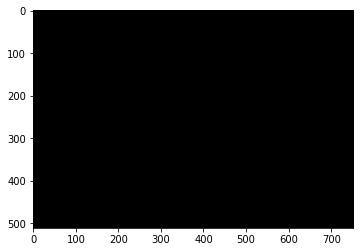

In [ ]:
img2_new_face = np.zeros_like(img2)
plt.imshow(img2_new_face)
plt.show

 Next is a function to extract the indexes of the triangles from the landmarks point array:

In [ ]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

#### Finding the indexes of each triangle (or specific landmarks points each triangle connects).

In [ ]:
indexes_triangles = []
for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)
        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)
        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)
        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)
        #cv2.line(img, pt1, pt2, (0, 0, 255), 2)
        #cv2.line(img, pt2, pt3, (0, 0, 255), 2)
        #cv2.line(img, pt1, pt3, (0, 0, 255), 2)

#### Triangulation of the 2nd face from the 1st face using Delaunay Triangulation

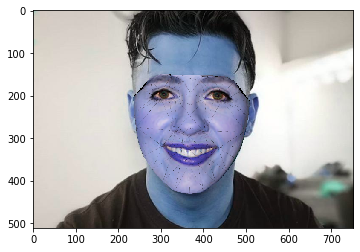

In [ ]:
# Triangulation of both faces
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)
    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                      [tr1_pt2[0] - x, tr1_pt2[1] - y],
                      [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)
    #cv2.line(img, tr1_pt1, tr1_pt2, (0, 0, 255), 2)
    #cv2.line(img, tr1_pt3, tr1_pt2, (0, 0, 255), 2)
    #cv2.line(img, tr1_pt1, tr1_pt3, (0, 0, 255), 2)

     # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2
    cropped_triangle2 = img2[y: y + h, x: x + w]
    cropped_tr2_mask = np.zeros((h, w), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                       [tr2_pt2[0] - x, tr2_pt2[1] - y],
                       [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)
    #cv2.line(img2, tr2_pt1, tr2_pt2, (0, 0, 255), 2)
    #cv2.line(img2, tr2_pt3, tr2_pt2, (0, 0, 255), 2)
    #cv2.line(img2, tr2_pt1, tr2_pt3, (0, 0, 255), 2)
    
    # Let's Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)##

    # *****Reconstructing destination face************************************************
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray= cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)

    #To remove the lines between triangles
    _, mask_triangles_designed=cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle=cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

    # Face swapped (putting 1st face into 2nd face)
    img2_face_mask = np.zeros_like(img2_gray)
    img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
    img2_face_mask = cv2.bitwise_not(img2_head_mask)

    img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
    result = cv2.add(img2_head_noface, img2_new_face)

    #plt.imshow(img2_new_face)
    plt.imshow(result)

Next line, help to visualize triangles from images 1 and images 2
and the warped triangle

In [ ]:
cv2_imshow(cropped_triangle)#cropped triangle 1
cv2_imshow(cropped_triangle2)#"cropped triangle 2"
cv2_imshow(warped_triangle)#"Warped triangle"

This is the face from image 1, adapted to the shape of the face of image 2

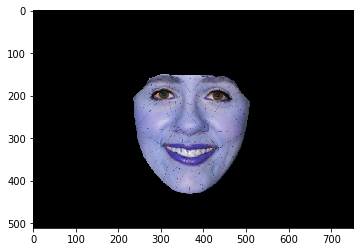

In [ ]:
plt.imshow(img2_new_face)

And here we have made space in image 2, to place the face of image 1

<function matplotlib.pyplot.show>

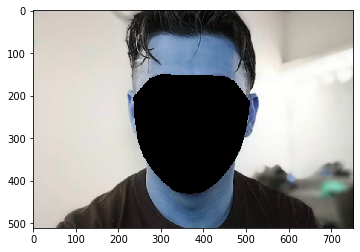

In [ ]:
plt.imshow(img2_head_noface)
plt.show


The following line helps to soften the edges of the face and the background body, as well as to place them in the same colors

In [ ]:
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w)/2), int((y + y + h)/2))
seamlessclone= cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)

### Result

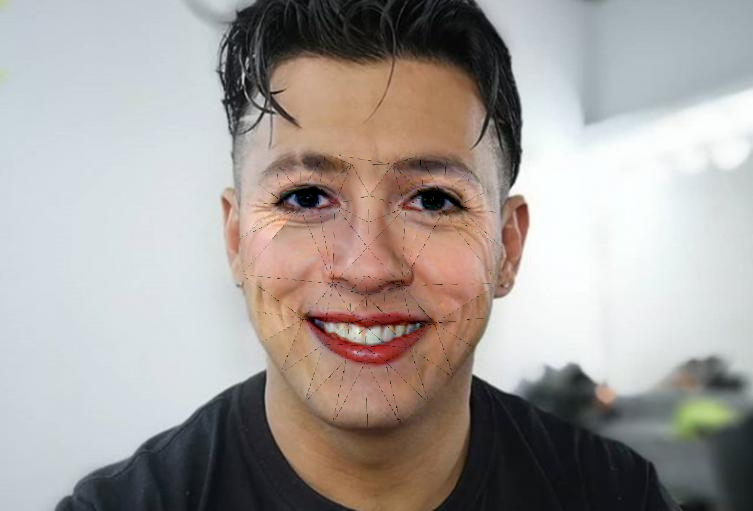

In [ ]:
cv2_imshow(seamlessclone)